## Demo of appliable transformations

Help:
https://pytorch.org/vision/main/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py


### Import required packages


In [2]:
import cv2
import math
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F


c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load images


In [3]:
smallImage = cv2.imread('images/21p_9_30.jpg')
smallImage = cv2.cvtColor(smallImage, cv2.COLOR_BGR2RGB)

bigImage = cv2.imread('images/01.bmp.png')
bigImage = cv2.cvtColor(bigImage, cv2.COLOR_BGR2RGB)


### Create image plotter function


In [4]:
def npPlotCVImage(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    plt.close()


def plotImages(images):
    if not isinstance(images[0], list):
        images = [images]

    count = len(images)
    rows = math.ceil(count / 5)
    cols = len(images[0])

    figure, axis = plt.subplots(nrows=rows, ncols=cols, squeeze=False)

    for rowIdx, row in enumerate(images):
        for colIdx, image in enumerate(row):
            ax = axis[rowIdx, colIdx]

            if isinstance(image, torch.Tensor):
                image = image.permute(1, 2, 0)

            ax.imshow(image)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()


### Show images in grid layout


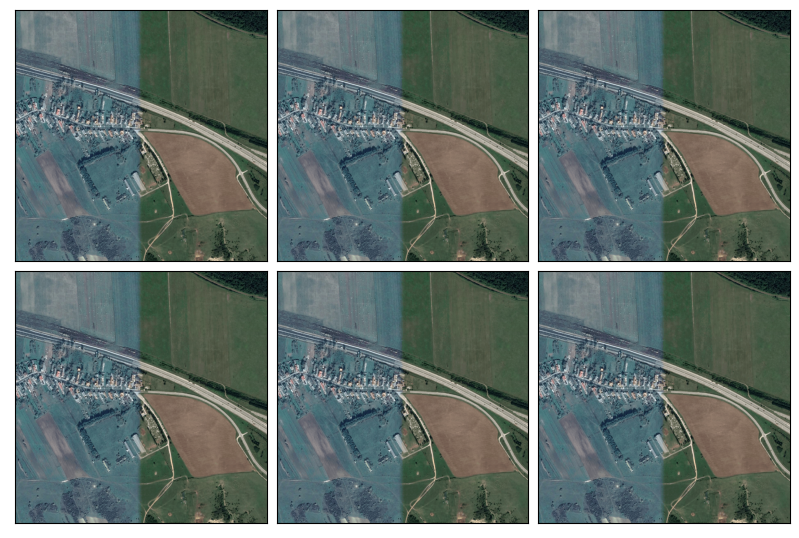

In [5]:
from mpl_toolkits.axes_grid1 import ImageGrid


def showImageGrid(images):
    figure = plt.figure(figsize=(10.0, 10.0))

    cols = 3
    rows = math.ceil(len(images) / cols)

    grid = ImageGrid(figure, 111, nrows_ncols=(
        rows, cols), axes_pad=0.1, share_all=True)

    grid[0].get_yaxis().set_ticks([])
    grid[0].get_xaxis().set_ticks([])

    for ax, image in zip(grid, images):

        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0)

        ax.imshow(image)

    plt.show()


showImageGrid([bigImage, bigImage, bigImage, bigImage, bigImage, bigImage])


### Plotter function test


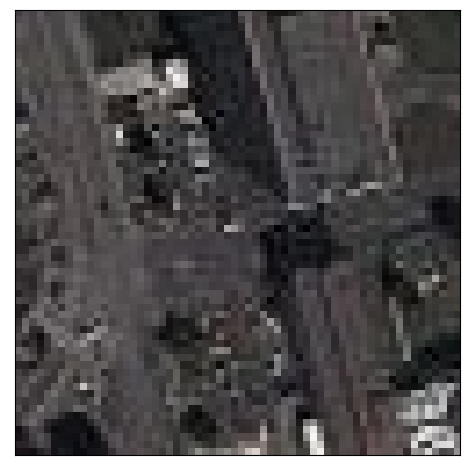

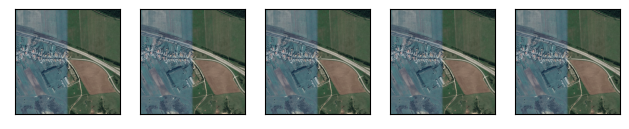

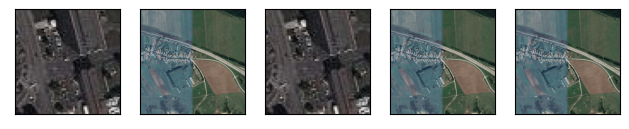

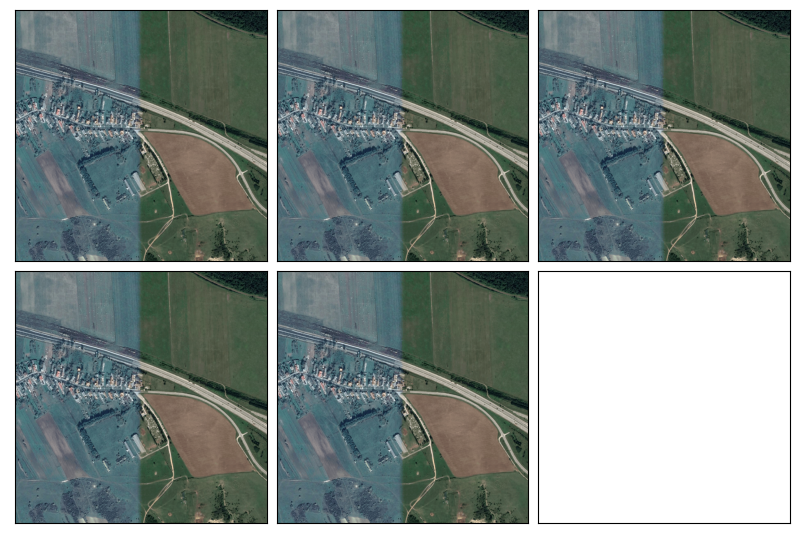

In [6]:
plotImages([smallImage])
plotImages([bigImage, bigImage, bigImage, bigImage, bigImage])
plotImages([smallImage, bigImage, smallImage, bigImage, bigImage])

showImageGrid([bigImage, bigImage, bigImage, bigImage, bigImage])


### Test normalizazion with calculated mean and std values


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


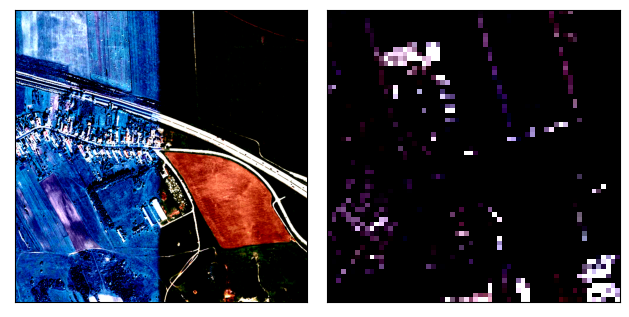

In [7]:
mean = (0.36720132, 0.38807531, 0.35384046)
std = (0.18385245, 0.17220756, 0.16941115)

transform = T.ToTensor()
transformedImage = transform(bigImage)
transformedSmallImage = transform(smallImage)
normalize = T.Normalize(mean=mean, std=std)
normalizedImages = [normalize(transformedImage),
                    normalize(transformedSmallImage)]
plotImages(normalizedImages)


### Test resize transformation


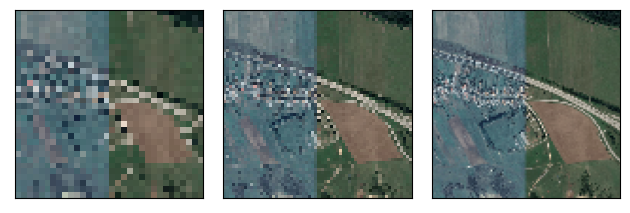

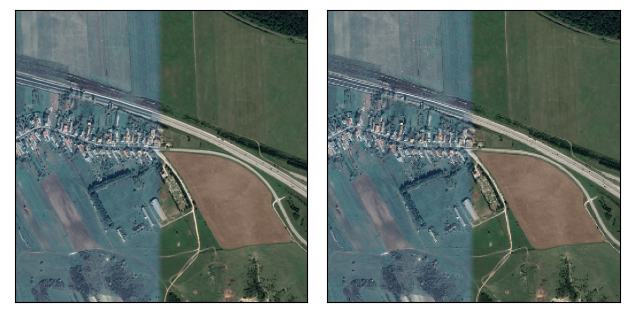

In [10]:
transform = T.ToTensor()
transformedImage = transform(bigImage)
resizedImages = [T.Resize(size=size)(transformedImage)
                 for size in (32, 62, 100)]
plotImages(resizedImages)

resizedImages = [T.Resize(size=255)(transformedImage)]
showImageGrid([transformedImage] + resizedImages)


### Test color jitter


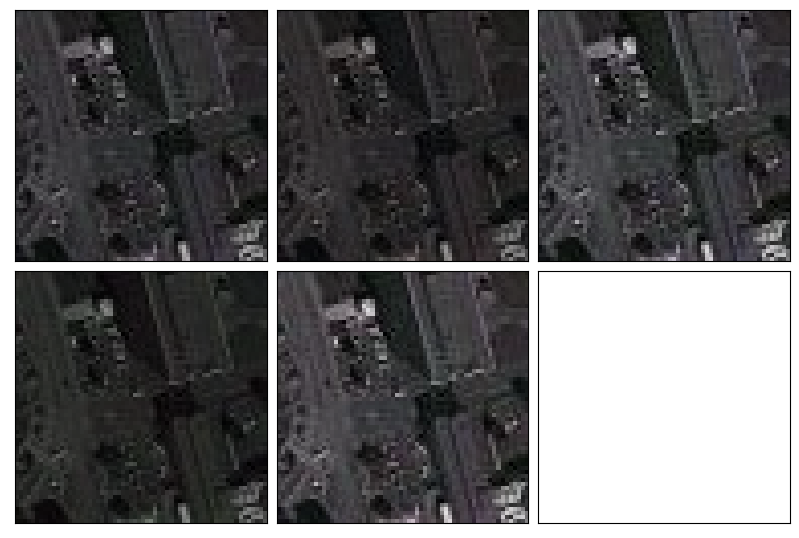

In [188]:
transform = T.ToTensor()
transformedImage = transform(smallImage)
jitter = T.ColorJitter(brightness=0.5, hue=0.3)
jittedImages = [jitter(transformedImage) for _ in range(5)]
# plotImages(jittedImages)
showImageGrid(jittedImages)


### Test gaussian blur


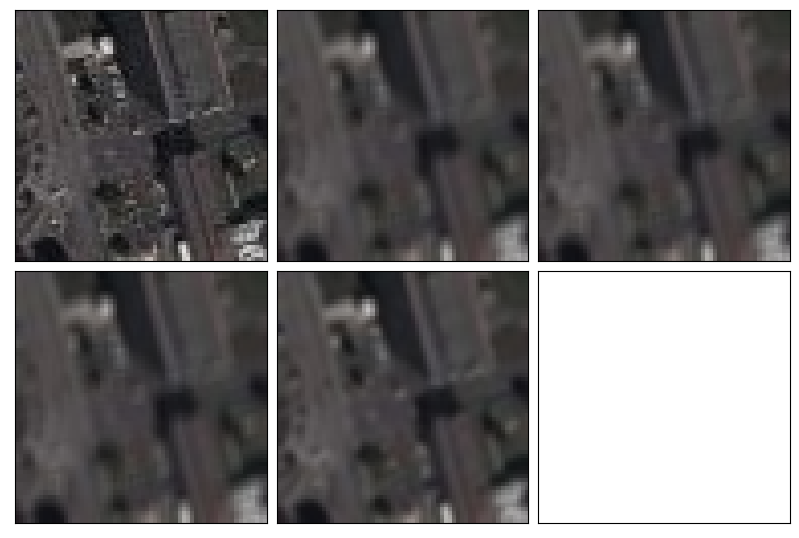

In [190]:
transform = T.ToTensor()
transformedImage = transform(smallImage)
blurrer = T.GaussianBlur(kernel_size=(3, 5), sigma=(0.1, 5))
blurredImages = [blurrer(transformedImage) for _ in range(5)]
# plotImages(blurredImages)
showImageGrid(blurredImages)


### Test random rotation

(Not applied, might lose features on hanging out parts)


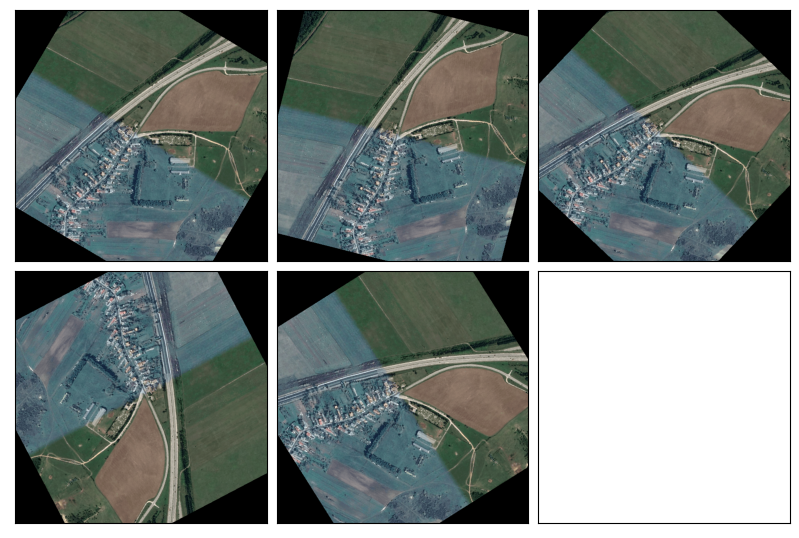

In [191]:
transform = T.ToTensor()
transformedImage = transform(bigImage)
rotater = T.RandomRotation(degrees=90)
rotatedImages = [rotater(transformedImage) for _ in range(5)]
# plotImages(rotatedImages)
showImageGrid(rotatedImages)


### Test rotation


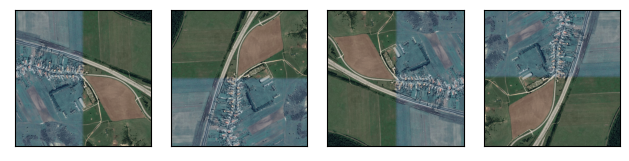

In [80]:
transform = T.ToTensor()
transformedImage = transform(bigImage)
rotatedImages = [F.rotate(transformedImage, angle)
                 for angle in [0, 90, 180, 270]]
plotImages(rotatedImages)


### Random 90 degree rotator


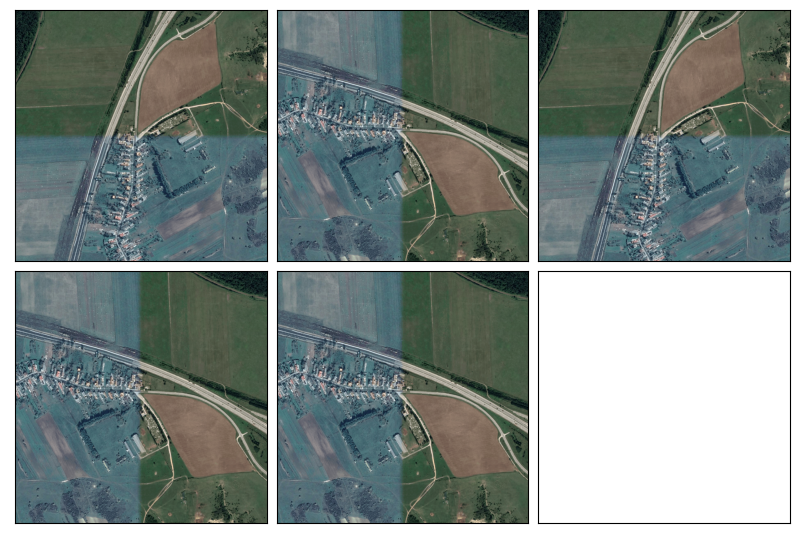

In [193]:
import random
transform = T.ToTensor()
transformedImage = transform(bigImage)
angles = [0, 90, 180, 270]
rotatedImages = [F.rotate(
    transformedImage, angles[random.randint(0, len(angles) - 1)]) for _ in range(5)]
# plotImages(rotatedImages)
showImageGrid(rotatedImages)


### Test elastic transform


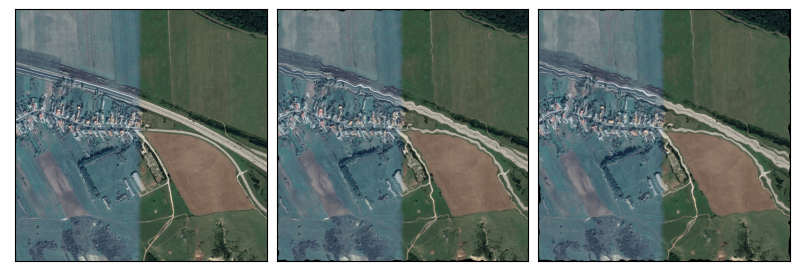

In [194]:
transform = T.ToTensor()
transformedImage = transform(bigImage)
elasticTransformer = T.ElasticTransform(alpha=100.0, sigma=5.0)
transformedImages = [elasticTransformer(transformedImage) for _ in range(2)]
# Show original too
#plotImages([transformedImage] + transformedImages)
showImageGrid([transformedImage] + transformedImages)


### Test random adjust sharpness


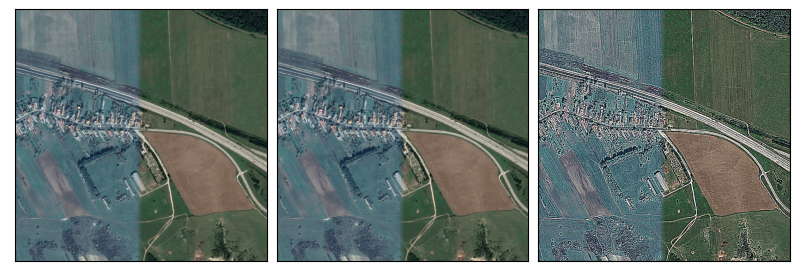

In [199]:
transform = T.ToTensor()
transformedImage = transform(bigImage)
sharpnessAdjuster = T.RandomAdjustSharpness(sharpness_factor=20)
sharpenedImages = [sharpnessAdjuster(transformedImage) for _ in range(2)]
# Show original too
#plotImages([transformedImage] + sharpenedImages)
showImageGrid([transformedImage] + sharpenedImages)


### Test random auto contrast


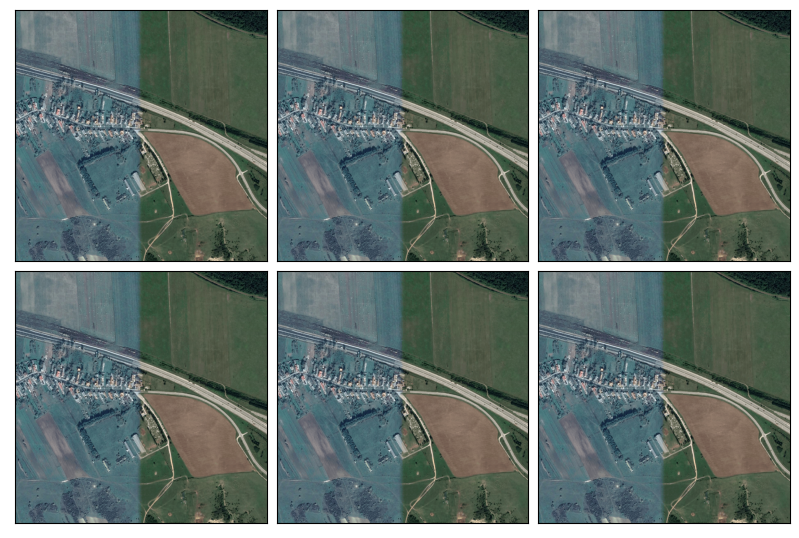

In [201]:
transform = T.ToTensor()
transformedImage = transform(bigImage)
contraster = T.RandomAutocontrast()
contrastedImages = [contraster(transformedImage) for _ in range(5)]
# Show original too
#plotImages([transformedImage] + contrastedImages)
showImageGrid([transformedImage] + contrastedImages)


### Test random flips


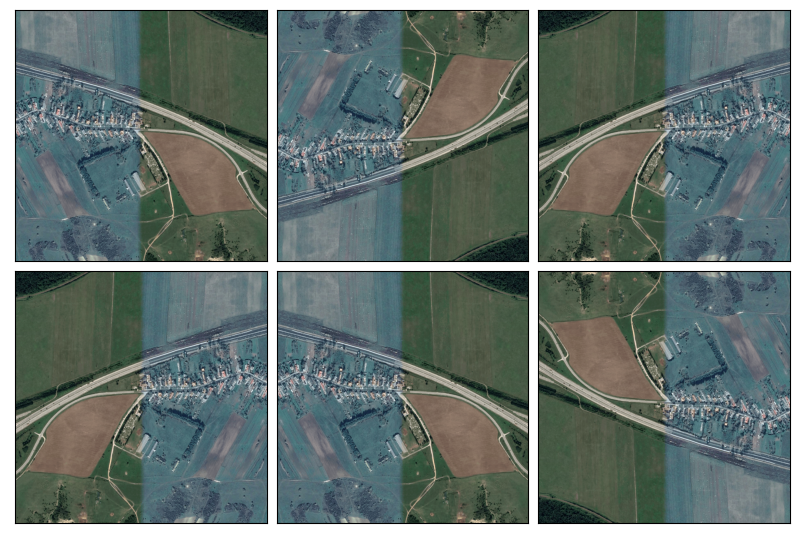

In [203]:
transform = T.ToTensor()
transformedImage = transform(bigImage)
hflipper = T.RandomHorizontalFlip(p=0.5)
vflipper = T.RandomVerticalFlip(p=0.5)
flips = T.Compose([hflipper, vflipper])
flippedImages = [flips(transformedImage) for _ in range(5)]
showImageGrid([transformedImage] + flippedImages)


### Apply multiple transforms

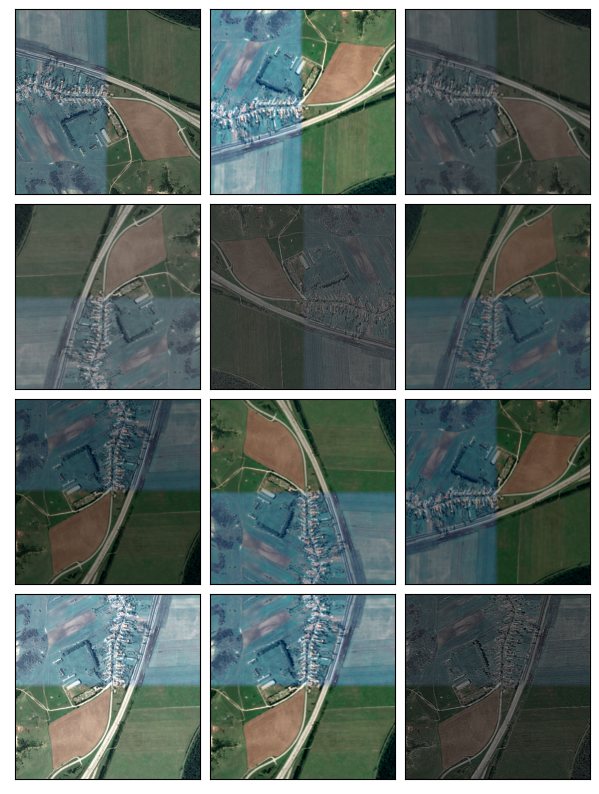

In [229]:
transforms = [T.ToTensor(),
              T.RandomAdjustSharpness(sharpness_factor=20),
              T.GaussianBlur(kernel_size=(3, 5), sigma=(0.1, 5)),
              T.ColorJitter(brightness=0.5, contrast=0.3, saturation=0.5),
              T.RandomHorizontalFlip(p=0.5),
              T.RandomVerticalFlip(p=0.5)]

composedTransforms = T.Compose(transforms)

angles = [0, 90, 180, 270]

transformedImages = [
    F.rotate(composedTransforms(bigImage), angles[random.randint(0, len(angles) - 1)]) for _ in range(11)]

showImageGrid([bigImage] + transformedImages)


### Apply multiple transforms randomly

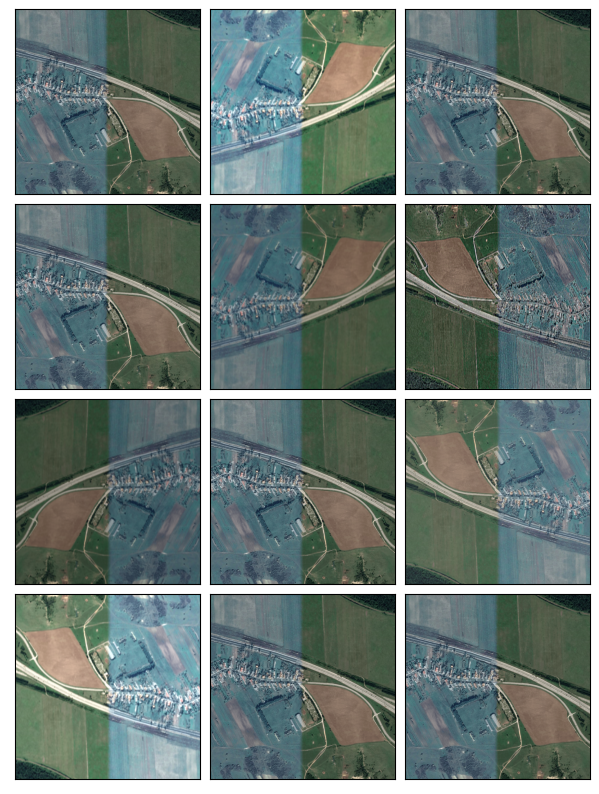

In [230]:
transforms = [T.ToTensor(),
              T.RandomAdjustSharpness(sharpness_factor=20),
              T.GaussianBlur(kernel_size=(3, 5), sigma=(0.1, 5)),
              T.ColorJitter(brightness=0.5, contrast=0.3, saturation=0.5),
              T.RandomHorizontalFlip(p=0.5),
              T.RandomVerticalFlip(p=0.5)]

randomApplier = T.RandomApply(transforms, p=0.5)
transformedImages = [randomApplier(bigImage) for _ in range(11)]

showImageGrid([bigImage] + transformedImages)


### Create custom rotation transform to use in transforms compose

In [232]:
import torchvision.transforms.functional as TF
import random

class RotationTransform:

    def __call__(self, x):
        angle = random.choice([0, 90, 180, 270])
        return TF.rotate(x, angle)

### Test with custom rotation transform

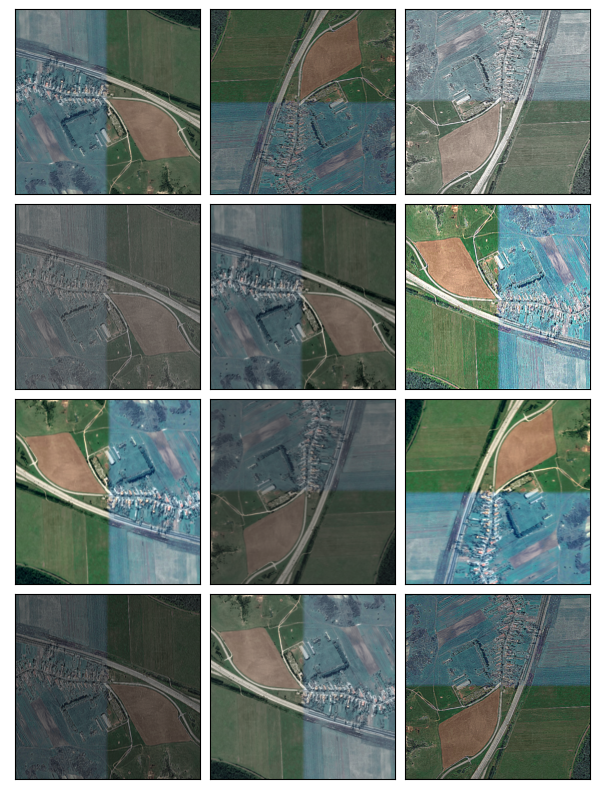

In [233]:
transforms = [T.ToTensor(),
              T.RandomAdjustSharpness(sharpness_factor=20),
              T.GaussianBlur(kernel_size=(3, 5), sigma=(0.1, 5)),
              T.ColorJitter(brightness=0.5, contrast=0.3, saturation=0.5),
              RotationTransform()]

composedTransforms = T.Compose(transforms)

transformedImages = [composedTransforms(bigImage) for _ in range(11)]

showImageGrid([bigImage] + transformedImages)